In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df_airbnb = pd.read_excel('/content/1730285881-Airbnb_Open_Data (1).xlsx')
display(df_airbnb.head())

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [ ]:
# Remove duplicates
df_airbnb.drop_duplicates(inplace=True)

# Drop unnecessary columns (ignore if not present)
df_airbnb.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# Check columns to confirm names (debugging)
print("Columns in dataset:", df_airbnb.columns.tolist())

# Clean currency columns (remove $ and ,) and convert to float
if 'price' in df_airbnb.columns:
    df_airbnb['price'] = (
        df_airbnb['price']
        .astype(str)
        .str.replace(r'[$,]', '', regex=True)
        .astype(float)
    )

if 'service fee' in df_airbnb.columns:
    df_airbnb['service fee'] = (
        df_airbnb['service fee']
        .astype(str)
        .str.replace(r'[$,]', '', regex=True)
        .astype(float)
    )

# Rename columns (only if they exist)
df_airbnb.rename(columns={
    'price': 'price_usd',
    'service fee': 'service_fee_usd'
}, inplace=True)

# Convert datatypes safely
if 'id' in df_airbnb.columns:
    df_airbnb['id'] = df_airbnb['id'].astype(str)

if 'host id' in df_airbnb.columns:
    df_airbnb['host id'] = df_airbnb['host id'].astype(str)

if 'last review' in df_airbnb.columns:
    df_airbnb['last review'] = pd.to_datetime(df_airbnb['last review'], errors='coerce')

if 'Construction year' in df_airbnb.columns:
    df_airbnb['Construction year'] = df_airbnb['Construction year'].astype('Int64')

# Fix typo in neighbourhood group
if 'neighbourhood group' in df_airbnb.columns:
    df_airbnb.loc[
        df_airbnb['neighbourhood group'].astype(str).str.lower() == 'brookln',
        'neighbourhood group'
    ] = 'Brooklyn'

# Remove invalid availability rows (Airbnb max = 365 days)
if 'availability 365' in df_airbnb.columns:
    df_airbnb = df_airbnb[df_airbnb['availability 365'] <= 365]


Columns in dataset: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price_usd', 'service_fee_usd', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']


In [ ]:
df_airbnb.duplicated().value_counts()

,count
False,98856


In [ ]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98856 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              98856 non-null  object        
 1   NAME                            98612 non-null  object        
 2   host id                         98856 non-null  object        
 3   host_identity_verified          98586 non-null  object        
 4   host name                       98467 non-null  object        
 5   neighbourhood group             98839 non-null  object        
 6   neighbourhood                   98843 non-null  object        
 7   lat                             98848 non-null  float64       
 8   long                            98848 non-null  float64       
 9   country                         98342 non-null  object        
 10  country code                    98747 non-null  object        
 11  instan

In [ ]:
df_airbnb.describe()

,lat,long,instant_bookable,Construction year,price_usd,service_fee_usd,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,98848.000000,98848.000000,98773.000000,98679.0,98620.000000,98592.000000,98494.000000,98727.000000,83802,83803.000000,98565.000000,98563.000000,98856.000000
mean,40.728001,-73.949400,0.497454,2012.488665,625.723819,125.115861,8.122403,27.263484,2019-06-23 10:58:25.921099776,1.388955,3.285071,8.049075,133.918235
min,40.499790,-74.249840,0.000000,2003.0,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.688690,-73.982540,0.000000,2007.0,340.000000,68.000000,2.000000,1.000000,2018-11-05 00:00:00,0.230000,2.000000,1.000000,2.000000
50%,40.722210,-73.954330,0.000000,2012.0,625.000000,125.000000,3.000000,7.000000,2019-06-15 00:00:00,0.760000,3.000000,1.000000,90.000000
75%,40.762683,-73.932000,1.000000,2017.0,913.000000,183.000000,5.000000,30.000000,2019-07-06 00:00:00,2.030000,4.000000,2.000000,253.000000
max,40.916970,-73.705220,1.000000,2022.0,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,365.000000
std,0.055946,0.049827,0.499996,5.765761,331.722859,66.337320,28.926330,49.087622,NaN,1.757104,1.280471,32.656432,129.850009


In [ ]:
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98856 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              98856 non-null  object        
 1   NAME                            98612 non-null  object        
 2   host id                         98856 non-null  object        
 3   host_identity_verified          98586 non-null  object        
 4   host name                       98467 non-null  object        
 5   neighbourhood group             98839 non-null  object        
 6   neighbourhood                   98843 non-null  object        
 7   lat                             98848 non-null  float64       
 8   long                            98848 non-null  float64       
 9   country                         98342 non-null  object        
 10  country code                    98747 non-null  object        
 11  instan

In [ ]:
display(df_airbnb['room type'].value_counts())

,count
room type,
Entire home/apt,51675
Private room,44916
Shared room,2150
Hotel room,115


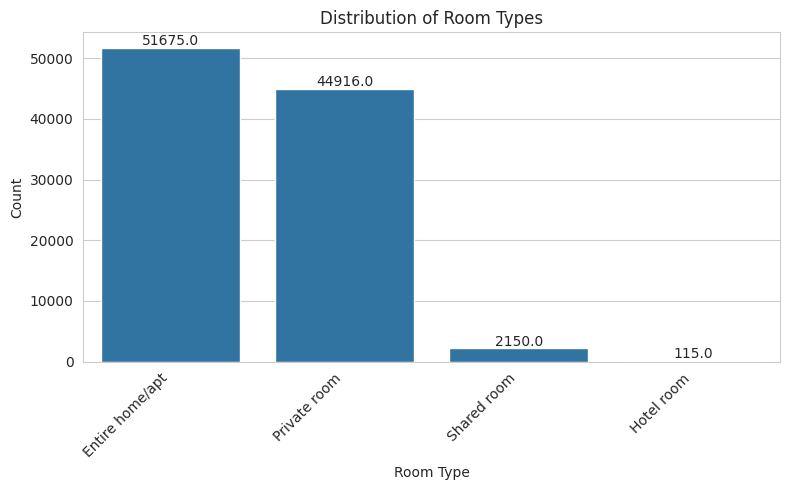

In [ ]:
room_type_counts = df_airbnb['room_type'].value_counts()

plt.figure(figsize=(8, 5)) # Adjusted figure size
ax = sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

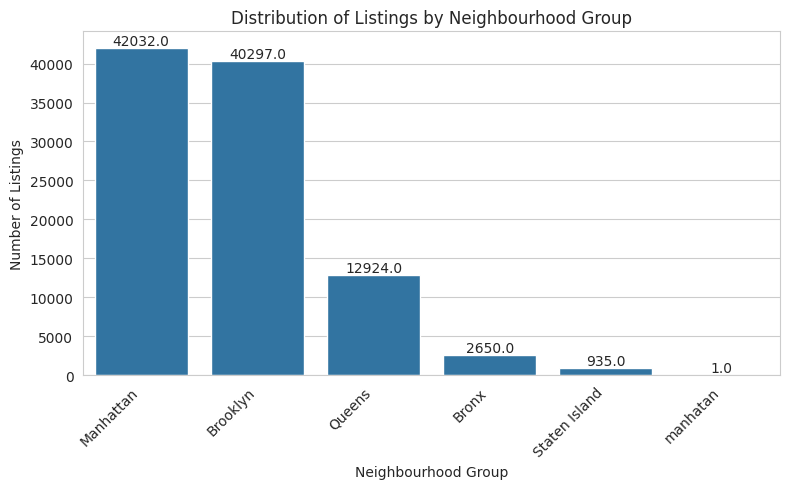

In [ ]:
plt.figure(figsize=(8, 5)) # Adjusted figure size
ax = sns.barplot(x=neighbourhood_group_counts.index, y=neighbourhood_group_counts.values)
plt.title('Distribution of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
# Investigate outliers in 'minimum nights' (values less than 0)
outliers_minimum_nights = df_airbnb[df_airbnb['minimum_nights'] < 0]

print("Outliers in 'minimum nights' (values < 0):")
display(outliers_minimum_nights)

print(f"\nNumber of outliers in 'minimum nights' (values < 0): {len(outliers_minimum_nights)}")

Outliers in 'minimum nights' (values < 0):


,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,construction_year,price_usd,service_fee_usd,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
176,1098541,BROOKLYN VICTORIAN STYLE SUITE.....,83631499592,unconfirmed,Frederick,Brooklyn,Fort Greene,40.69098,-73.97113,United States,...,2008,1155.0,231.0,-10.0,213.0,2019-06-24,2.00,5.0,2.0,19.0
352,1195746,"Beautiful, Brightâ€™s, Warm & Spacious 1.5BR Apt",2227683633,unconfirmed,Grant,Brooklyn,Crown Heights,40.67174,-73.95663,NaN,...,2009,73.0,15.0,-5.0,104.0,2019-06-21,1.04,5.0,1.0,31.0
398,1221151,SUPER BIG AND COZY PRIVATE BEDROOM,50336791874,verified,Tucker,Brooklyn,Kensington,40.64302,-73.97255,United States,...,2015,779.0,156.0,-1.0,82.0,2019-05-19,0.94,2.0,2.0,131.0
421,1233854,Charming Nolita Apartment!!,7389895192,verified,Belinda,Manhattan,Nolita,40.72094,-73.99706,United States,...,2008,874.0,175.0,-10.0,68.0,2019-06-10,0.69,5.0,1.0,13.0
441,1244900,Cozy apartment in a brownstone,81186886194,verified,Adelaide,Manhattan,Harlem,40.80497,-73.95016,United States,...,2021,920.0,184.0,-12.0,203.0,2019-07-06,2.14,5.0,3.0,77.0
525,1291294,Chateau Style Brooklyn Loft for Singles or Cou...,2631536622,verified,Carlos,Brooklyn,Bedford-Stuyvesant,40.68967,-73.95445,United States,...,2022,413.0,83.0,-3.0,42.0,2019-05-18,0.44,5.0,1.0,292.0
42446,24444262,"Cozy room in bright, spacious apartment",84040511136,verified,Steven,Bronx,Hunts Point,40.81731,-73.89052,United States,...,2003,1200.0,240.0,-1223.0,0.0,NaT,NaN,2.0,4.0,341.0
42500,24474086,2bd BOUTIQUE Apartament in the heart of MANHA...,2679070022,unconfirmed,Tom,Manhattan,Hell's Kitchen,40.76694,-73.98773,United States,...,2009,711.0,142.0,-365.0,13.0,2019-07-07,5.91,4.0,4.0,0.0
42538,24495073,Newly Renovated Garden Apartment,98469733112,verified,Margie,Brooklyn,Bedford-Stuyvesant,40.68470,-73.94350,United States,...,2022,85.0,17.0,-200.0,3.0,2019-04-23,1.06,2.0,1.0,157.0
69749,39523709,Amazing location! 10ft from L train,62132542936,verified,Giorgia & Benjamin,Brooklyn,Williamsburg,40.71534,-73.94906,United States,...,2012,328.0,66.0,-125.0,146.0,2019-06-23,1.78,1.0,1.0,46.0



Number of outliers in 'minimum nights' (values < 0): 12


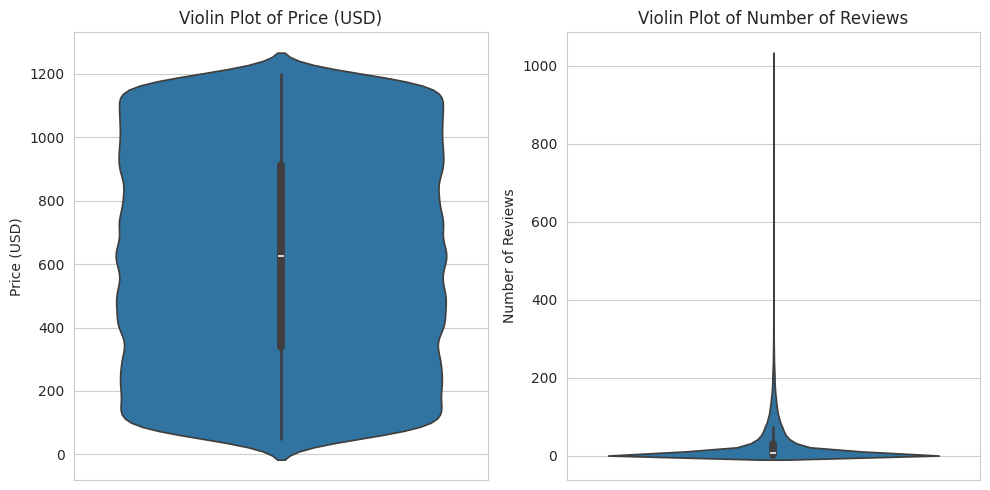

In [ ]:
plt.figure(figsize=(10, 5)) # Adjusted figure size

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.violinplot(y=df_airbnb['price_usd'])
plt.title('Violin Plot of Price (USD)')
plt.ylabel('Price (USD)')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.violinplot(y=df_airbnb['number_of_reviews'])
plt.title('Violin Plot of Number of Reviews')
plt.ylabel('Number of Reviews')

plt.tight_layout()
plt.show()

In [ ]:
# Investigate outliers in 'last review' (future dates)
current_date = pd.to_datetime('today')
outliers_last_review_future = df_airbnb[df_airbnb['last_review'] > current_date]

print("Outliers in 'last review' (future dates):")
display(outliers_last_review_future)

print(f"\nNumber of outliers in 'last review' (future dates): {len(outliers_last_review_future)}")

Outliers in 'last review' (future dates):


,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,construction_year,price_usd,service_fee_usd,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
255,1142173,Beautiful Landmarked Duplex,87944779917,NaN,Baker,Brooklyn,Greenpoint,40.72945,-73.95511,United States,...,2008,842.0,168.0,3.0,124.0,2058-06-16,1.22,4.0,3.0,230.0
318,1176967,NaN,70084472212,verified,Barnes,Brooklyn,Greenpoint,40.72488,-73.95018,United States,...,2018,920.0,184.0,2.0,1.0,2026-03-28,0.01,3.0,1.0,73.0
483,1268097,Modern Space in Charming Pre-war,13746585241,verified,Adelaide,Manhattan,Harlem,40.82411,-73.94934,United States,...,<NA>,721.0,144.0,2.0,41.0,2040-06-16,0.43,3.0,2.0,47.0



Number of outliers in 'last review' (future dates): 3


In [ ]:
# Remove rows with negative 'minimum_nights'
df_airbnb = df_airbnb[df_airbnb['minimum_nights'] >= 0]

# Verify that the outliers have been removed
print(f"Number of rows after removing outliers in 'minimum_nights': {len(df_airbnb)}")

Number of rows after removing outliers in 'minimum_nights': 98482


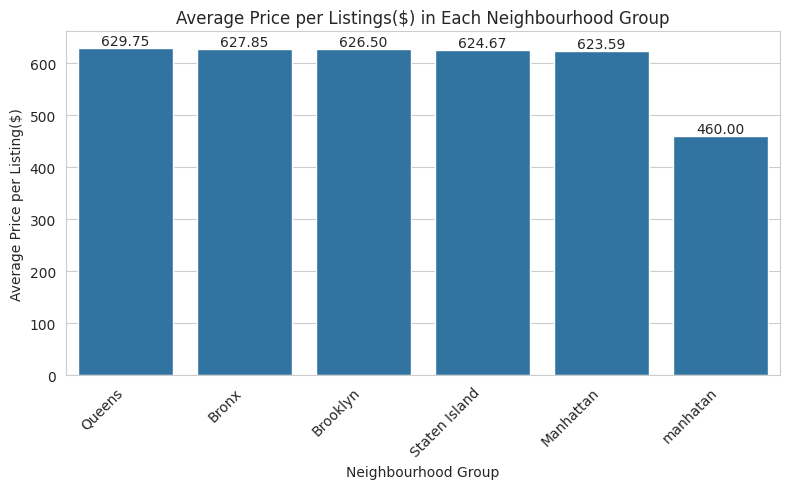

In [ ]:
plt.figure(figsize=(8, 5)) # Adjusted figure size
ax = sns.barplot(x=average_price_by_neighbourhood_group.index, y=average_price_by_neighbourhood_group.values)
plt.title('Average Price per Listings($) in Each Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price per Listing($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
average_price_by_neighbourhood_group = df_airbnb.groupby('neighbourhood group')['price_usd'].mean().sort_values(ascending=False)
display(average_price_by_neighbourhood_group)

,price_usd
neighbourhood group,
Queens,629.749205
Bronx,627.853575
Brooklyn,626.497289
Staten Island,624.674893
Manhattan,623.588853
manhatan,460.000000


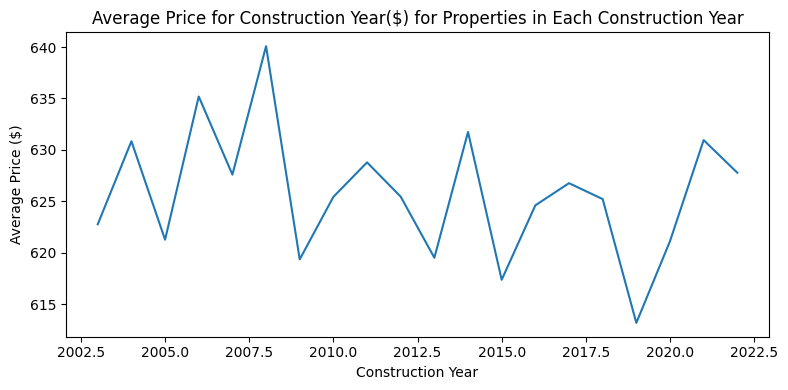

In [ ]:
average_price_by_construction_year = df_airbnb.groupby('Construction year')['price_usd'].mean()

plt.figure(figsize=(8, 4)) # Adjusted figure size
sns.lineplot(data=average_price_by_construction_year)
plt.title('Average Price for Construction Year($) for Properties in Each Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

In [ ]:
# Get unique host names and their counts
host_name_counts = df_airbnb['host name'].value_counts()

print(f"Total number of unique host names: {len(host_name_counts)}")
print("\nMost frequent host names:")
display(host_name_counts.head(10)) # Display the top 10 most frequent host names

# If you want to see all unique host names, you can uncomment the line below, but be aware it might be a very long list.
# print("\nAll unique host names:")
# display(df_airbnb['host name'].unique())

Total number of unique host names: 12961

Most frequent host names:


,count
host name,
Michael,855
David,734
John,563
Alex,520
Sonder (NYC),516
Daniel,448
Karen,429
Sarah,416
Maria,408


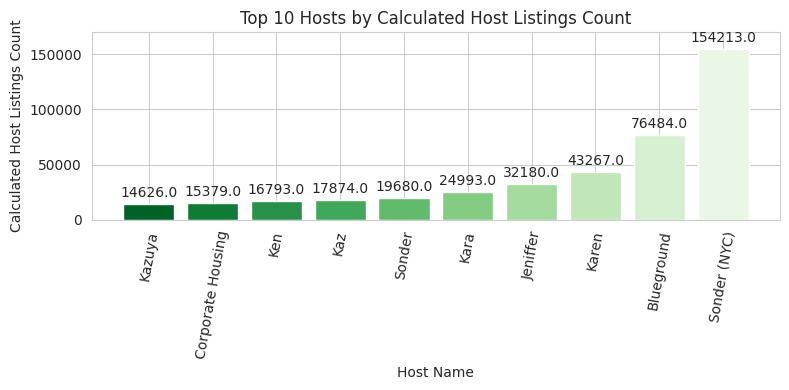

In [ ]:
hosts = df_airbnb.groupby('host_name')['calculated_host_listings_count'].sum() \
                 .sort_values(ascending=False).nlargest(10).to_frame()

# Sort hosts by calculated host listings count in ascending order for correct color mapping
hosts_sorted = hosts.sort_values(by='calculated_host_listings_count', ascending=True)

# Create a color palette based on the listing counts (dark to light green as count decreases)
n_colors = len(hosts_sorted)
colors = sns.color_palette("Greens_r", n_colors) # _r reverses the palette to go from dark to light

plt.figure(figsize=(8, 4)) # Adjusted figure size
ax = plt.bar(hosts_sorted.index, hosts_sorted['calculated_host_listings_count'], color=colors)

plt.bar_label(ax,
              labels=hosts_sorted['calculated_host_listings_count'],
              label_type='edge', padding=3)

plt.xlabel('Host Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation=80)
plt.ylim([0,hosts_sorted['calculated_host_listings_count'].max() * 1.1]) # Adjust y-limit based on max value
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average review rate for each host identity verification status
average_review_rate_by_verification = df_airbnb.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()

# Display the result
display(average_review_rate_by_verification)

,review rate number
host_identity_verified,
verified,3.290181
unconfirmed,3.280169


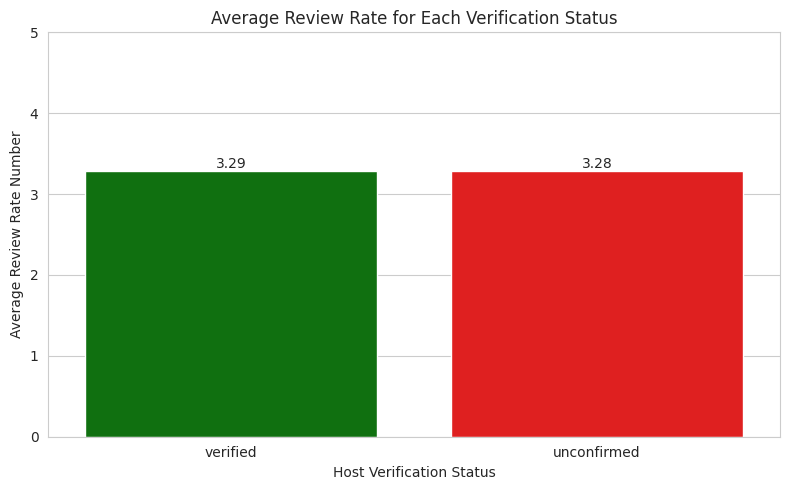

In [ ]:
# Create a bar plot for average review rate by host identity verification status
plt.figure(figsize=(8, 5))
# Define a custom color palette
colors = ['green' if status == 'verified' else 'red' for status in average_review_rate_by_verification.index]
ax = sns.barplot(x=average_review_rate_by_verification.index, y='review rate number', data=average_review_rate_by_verification, palette=colors, hue=average_review_rate_by_verification.index, legend=False)

plt.title('Average Review Rate for Each Verification Status')
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate Number')
plt.ylim([0, 5]) # Set y-axis limit to the maximum possible review rate

# Add values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

The correlation coefficient between price and service fee is: 1.00


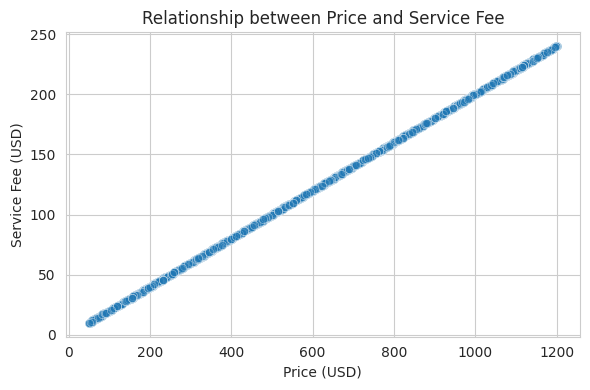

In [ ]:
# Calculate the correlation coefficient between price and service fee
correlation = df_airbnb['price_usd'].corr(df_airbnb['service_fee_usd'])

print(f"The correlation coefficient between price and service fee is: {correlation:.2f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(6, 4)) # Adjusted figure size
sns.scatterplot(data=df_airbnb, x='price_usd', y='service_fee_usd', alpha=0.5)
plt.title('Relationship between Price and Service Fee')
plt.xlabel('Price (USD)')
plt.ylabel('Service Fee (USD)')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average review rate number by neighbourhood group and room type
average_review_rate_by_group_and_type = df_airbnb.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().unstack()

# Display the result
display(average_review_rate_by_group_and_type)

room type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood group,,,,
Bronx,3.340020,NaN,3.338148,3.238938
Brooklyn,3.258931,3.857143,3.270346,3.332919
Manhattan,3.281537,3.500000,3.284755,3.266821
Queens,3.352541,3.750000,3.318773,3.364943
Staten Island,3.319742,NaN,3.466518,3.533333
manhatan,NaN,NaN,3.000000,NaN


In [ ]:
# Calculate the overall average review rate number
overall_average_review_rate = df_airbnb['review rate number'].mean()
print(f"Overall average review rate number: {overall_average_review_rate:.2f}")

# Calculate the average review rate number by neighbourhood group
average_review_rate_by_neighbourhood_group = df_airbnb.groupby('neighbourhood group')['review rate number'].mean().sort_values(ascending=False)
print("\nAverage review rate number by neighbourhood group:")
display(average_review_rate_by_neighbourhood_group)

# Calculate the average review rate number by room type
average_review_rate_by_room_type = df_airbnb.groupby('room type')['review rate number'].mean().sort_values(ascending=False)
print("\nAverage review rate number by room type:")
display(average_review_rate_by_room_type)

Overall average review rate number: 3.29

Average review rate number by neighbourhood group:


,review rate number
neighbourhood group,
Staten Island,3.393972
Bronx,3.334599
Queens,3.333385
Manhattan,3.282956
Brooklyn,3.266090
manhatan,3.000000



Average review rate number by room type:


,review rate number
room type,
Hotel room,3.539130
Shared room,3.307979
Private room,3.287750
Entire home/apt,3.281223


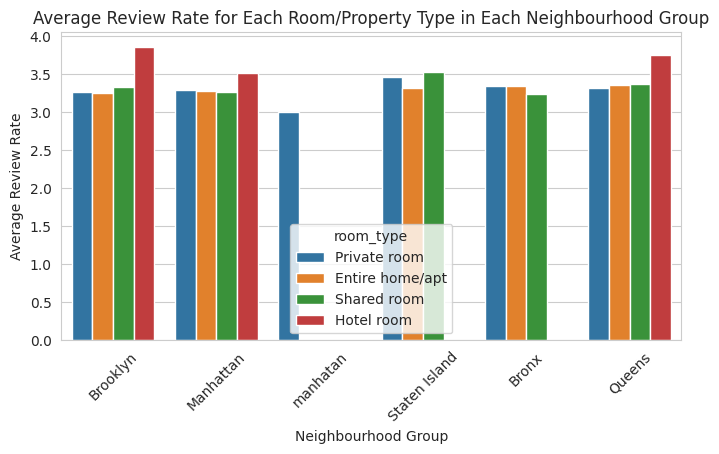

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Clean column names
# df_airbnb = df_airbnb.rename(columns=lambda x: x.strip().lower().replace(" ", "_")) # This line was moved to cleaning section

# Plot average review rate
plt.figure(figsize=(8,4)) # Adjusted figure size
sns.set_style("whitegrid")

sns.barplot(
    data=df_airbnb,
    x='neighbourhood_group',
    y='review_rate_number',
    hue='room_type',
    estimator=np.mean,   # explicitly show mean
    errorbar=None              # remove error bars if not needed
)

plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for Each Room/Property Type in Each Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Identify combinations with the highest average review rates
print("Combinations with the highest average review rates:")
display(average_review_rate_by_group_and_type.stack().sort_values(ascending=False).head())

# Identify combinations with the lowest average review rates
print("\nCombinations with the lowest average review rates:")
display(average_review_rate_by_group_and_type.stack().sort_values(ascending=True).head())

Combinations with the highest average review rates:


,,0
neighbourhood group,room type,
Brooklyn,Hotel room,3.857143
Queens,Hotel room,3.750000
Staten Island,Shared room,3.533333
Manhattan,Hotel room,3.500000
Staten Island,Private room,3.466518



Combinations with the lowest average review rates:


,,0
neighbourhood group,room type,
manhatan,Private room,3.000000
Bronx,Shared room,3.238938
Brooklyn,Entire home/apt,3.258931
Manhattan,Shared room,3.266821
Brooklyn,Private room,3.270346


The correlation coefficient between calculated host listings count and availability 365 is: 0.17


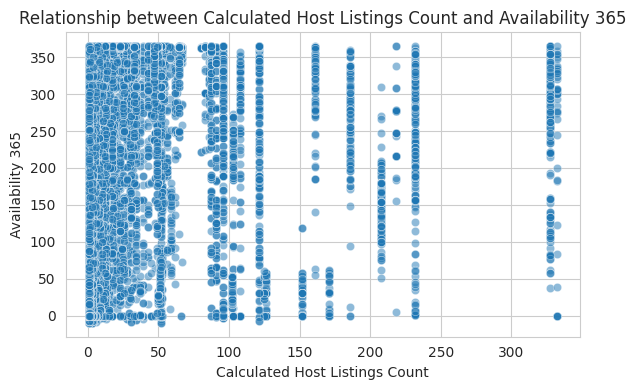

In [ ]:
# Calculate the correlation coefficient between calculated host listings count and availability 365
correlation_listings_availability = df_airbnb['calculated_host_listings_count'].corr(df_airbnb['availability_365'])

print(f"The correlation coefficient between calculated host listings count and availability 365 is: {correlation_listings_availability:.2f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(6, 4)) # Adjusted figure size
sns.scatterplot(data=df_airbnb, x='calculated_host_listings_count', y='availability_365', alpha=0.5)
plt.title('Relationship between Calculated Host Listings Count and Availability 365')
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365')
plt.tight_layout()
plt.show()

In [ ]:
# Investigate outliers in 'minimum nights' (values less than 0)
outliers_minimum_nights = df_airbnb[df_airbnb['minimum_nights'] < 0]

print("Outliers in 'minimum nights' (values < 0):")
display(outliers_minimum_nights)

print(f"\nNumber of outliers in 'minimum nights' (values < 0): {len(outliers_minimum_nights)}")

Outliers in 'minimum nights' (values < 0):


,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,construction_year,price_usd,service_fee_usd,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365
176,1098541,BROOKLYN VICTORIAN STYLE SUITE.....,83631499592,unconfirmed,Frederick,Brooklyn,Fort Greene,40.69098,-73.97113,United States,...,2008,1155.0,231.0,-10.0,213.0,2019-06-24,2.00,5.0,2.0,19.0
352,1195746,"Beautiful, Brightâ€™s, Warm & Spacious 1.5BR Apt",2227683633,unconfirmed,Grant,Brooklyn,Crown Heights,40.67174,-73.95663,NaN,...,2009,73.0,15.0,-5.0,104.0,2019-06-21,1.04,5.0,1.0,31.0
398,1221151,SUPER BIG AND COZY PRIVATE BEDROOM,50336791874,verified,Tucker,Brooklyn,Kensington,40.64302,-73.97255,United States,...,2015,779.0,156.0,-1.0,82.0,2019-05-19,0.94,2.0,2.0,131.0
421,1233854,Charming Nolita Apartment!!,7389895192,verified,Belinda,Manhattan,Nolita,40.72094,-73.99706,United States,...,2008,874.0,175.0,-10.0,68.0,2019-06-10,0.69,5.0,1.0,13.0
441,1244900,Cozy apartment in a brownstone,81186886194,verified,Adelaide,Manhattan,Harlem,40.80497,-73.95016,United States,...,2021,920.0,184.0,-12.0,203.0,2019-07-06,2.14,5.0,3.0,77.0
525,1291294,Chateau Style Brooklyn Loft for Singles or Cou...,2631536622,verified,Carlos,Brooklyn,Bedford-Stuyvesant,40.68967,-73.95445,United States,...,2022,413.0,83.0,-3.0,42.0,2019-05-18,0.44,5.0,1.0,292.0
42446,24444262,"Cozy room in bright, spacious apartment",84040511136,verified,Steven,Bronx,Hunts Point,40.81731,-73.89052,United States,...,2003,1200.0,240.0,-1223.0,0.0,NaT,NaN,2.0,4.0,341.0
42500,24474086,2bd BOUTIQUE Apartament in the heart of MANHA...,2679070022,unconfirmed,Tom,Manhattan,Hell's Kitchen,40.76694,-73.98773,United States,...,2009,711.0,142.0,-365.0,13.0,2019-07-07,5.91,4.0,4.0,0.0
42538,24495073,Newly Renovated Garden Apartment,98469733112,verified,Margie,Brooklyn,Bedford-Stuyvesant,40.68470,-73.94350,United States,...,2022,85.0,17.0,-200.0,3.0,2019-04-23,1.06,2.0,1.0,157.0
69749,39523709,Amazing location! 10ft from L train,62132542936,verified,Giorgia & Benjamin,Brooklyn,Williamsburg,40.71534,-73.94906,United States,...,2012,328.0,66.0,-125.0,146.0,2019-06-23,1.78,1.0,1.0,46.0



Number of outliers in 'minimum nights' (values < 0): 12
